<a href="https://colab.research.google.com/github/KOdunga/AIMLCourse/blob/main/Boston_House_Pricing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

### Load the dataset

In [2]:
boston = pd.read_csv('/content/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Check the shape of the dataset

In [3]:
boston.shape

(506, 13)

### Get the info regarding column datatypes

In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### Get summary statistics for the numerical columns

In [10]:
boston.describe(include= 'all')

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

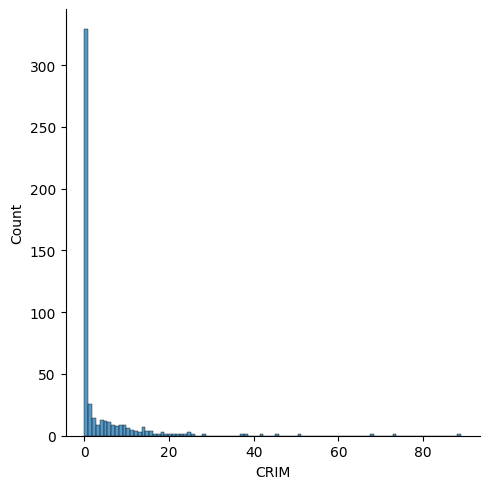

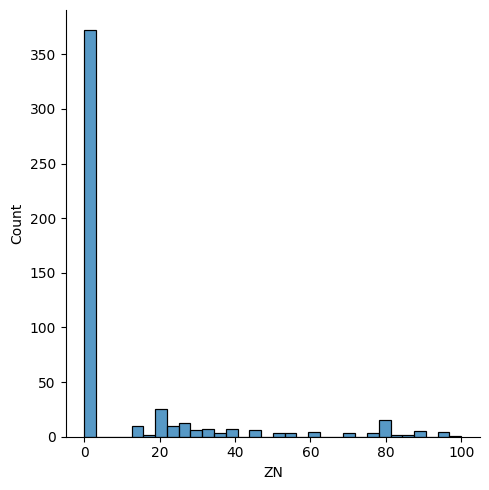

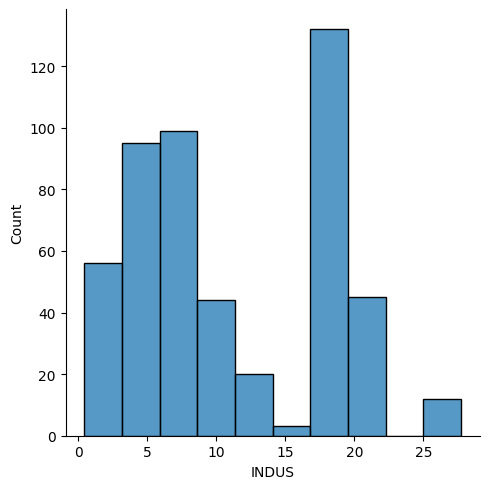

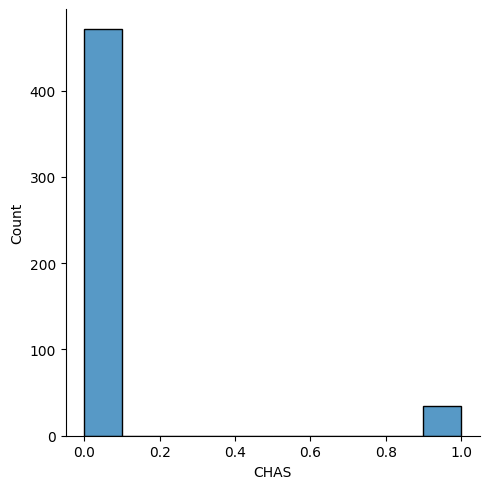

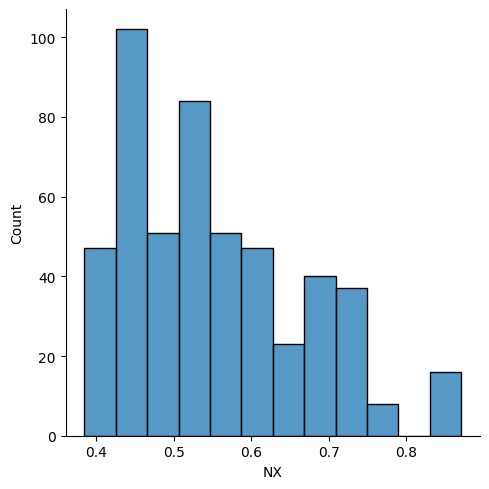

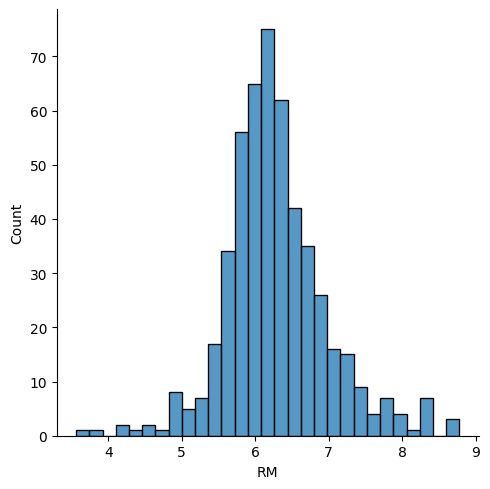

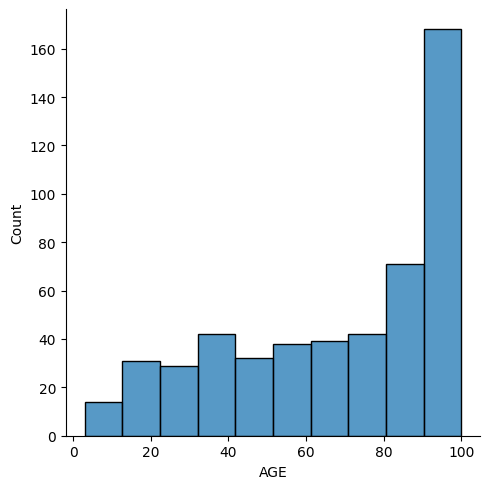

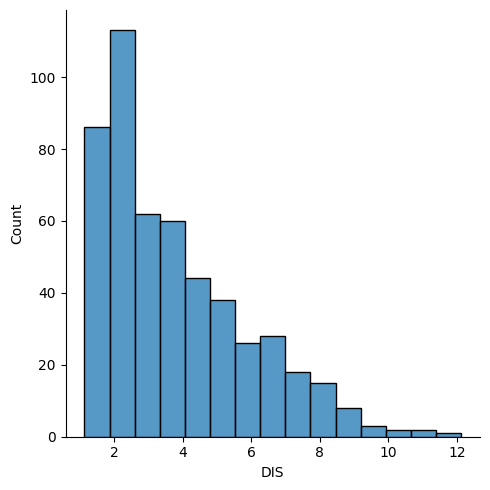

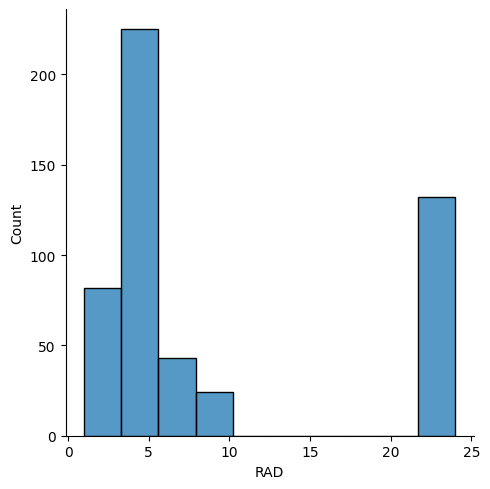

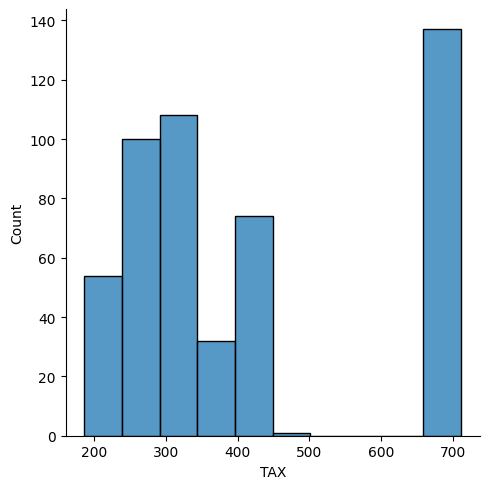

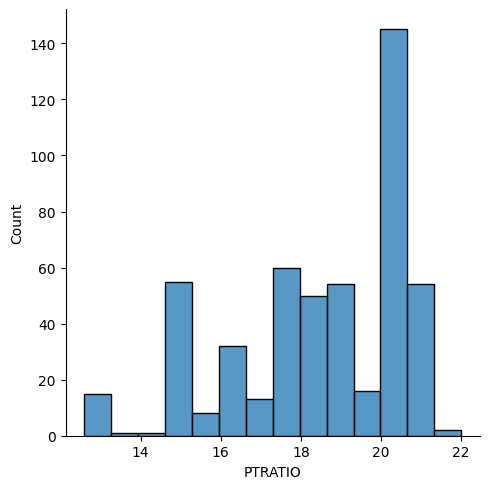

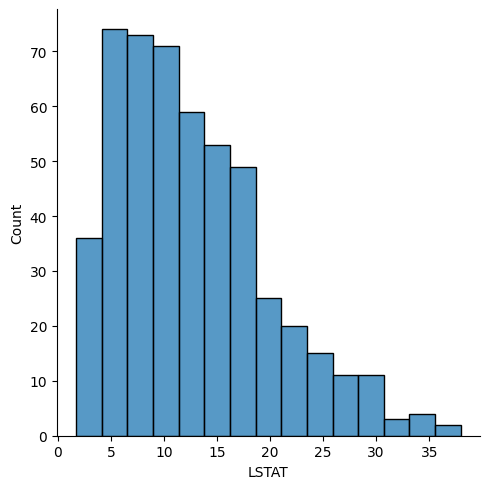

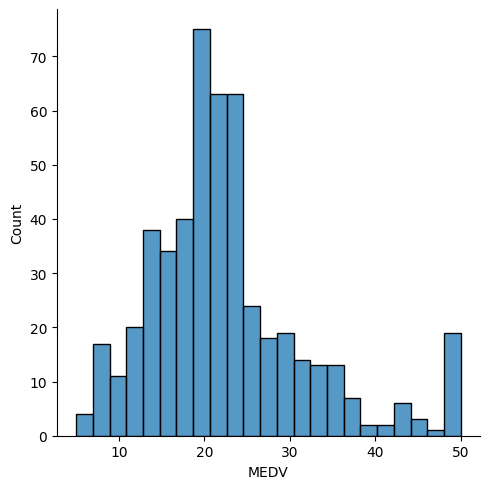

In [13]:
num_feats= ['CRIM','ZN','INDUS','CHAS','NX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','MEDV']
for feat in num_feats:
  sns.displot(data = boston, x =feat);

- The crime rate is highly right skewed
- Average number of rooms is normally distributed.

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

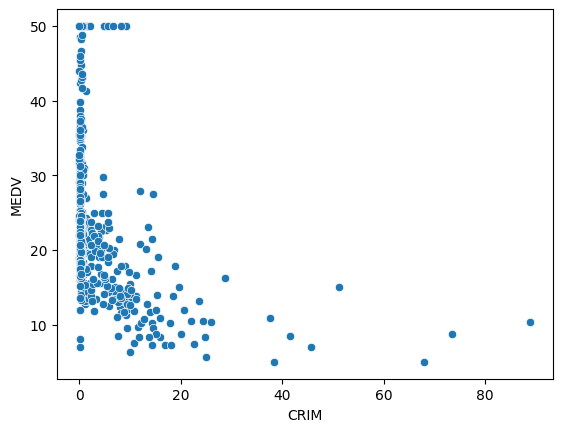

In [19]:
sns.scatterplot(data = boston, x = 'CRIM', y= 'MEDV');

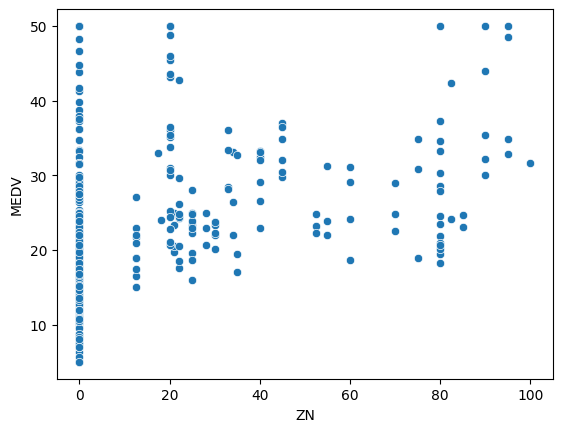

In [20]:
sns.scatterplot(data = boston, x = 'ZN', y= 'MEDV');

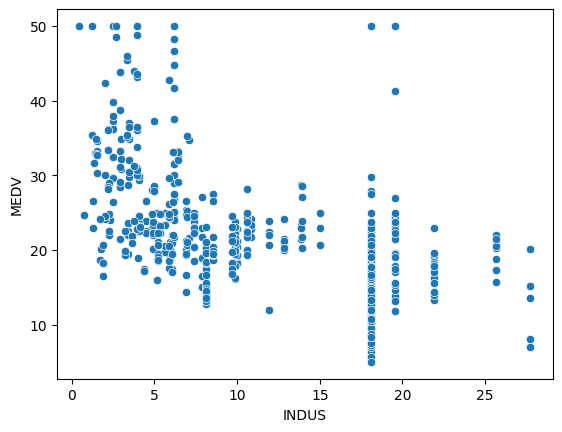

In [21]:
sns.scatterplot(data = boston, x = 'INDUS', y= 'MEDV');

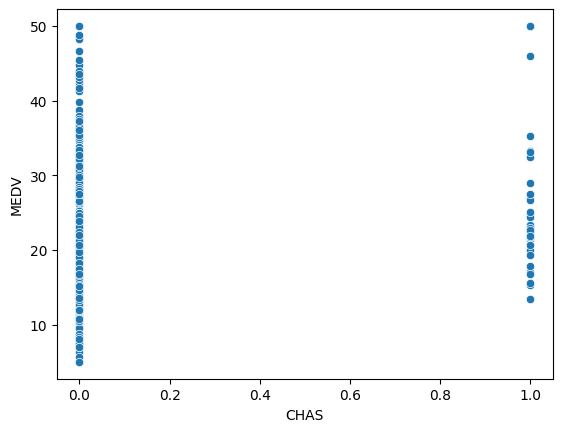

In [22]:
sns.scatterplot(data = boston, x = 'CHAS', y= 'MEDV');

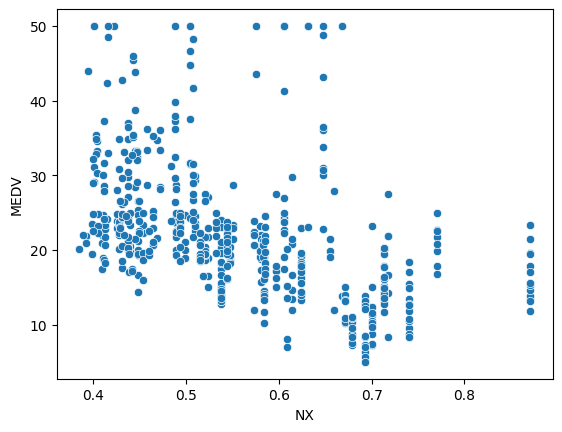

In [23]:
sns.scatterplot(data = boston, x = 'NX', y= 'MEDV');

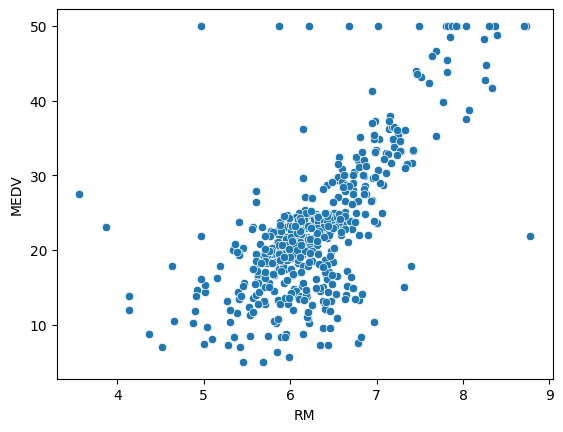

In [24]:
sns.scatterplot(data = boston, x = 'RM', y= 'MEDV');

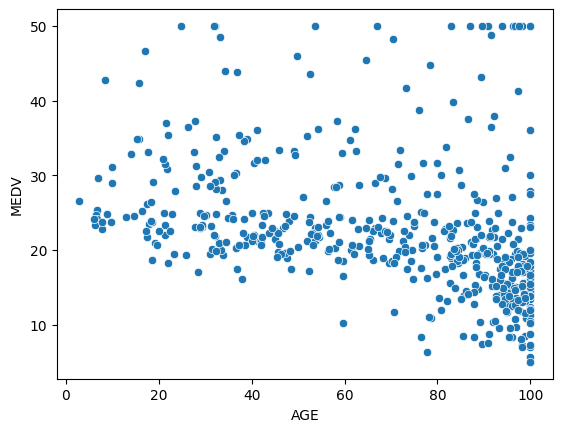

In [25]:
sns.scatterplot(data = boston, x = 'AGE', y= 'MEDV');

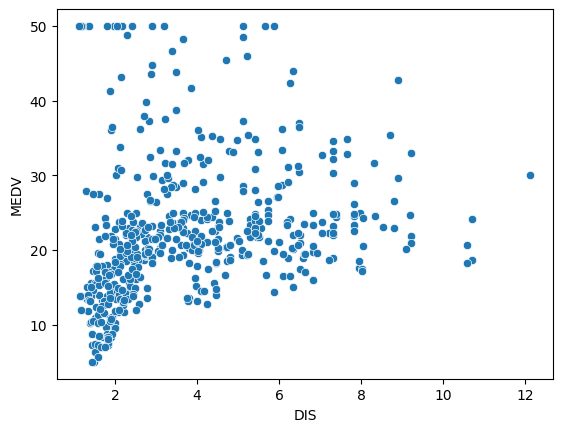

In [29]:
sns.scatterplot(data = boston, x = 'DIS', y= 'MEDV');

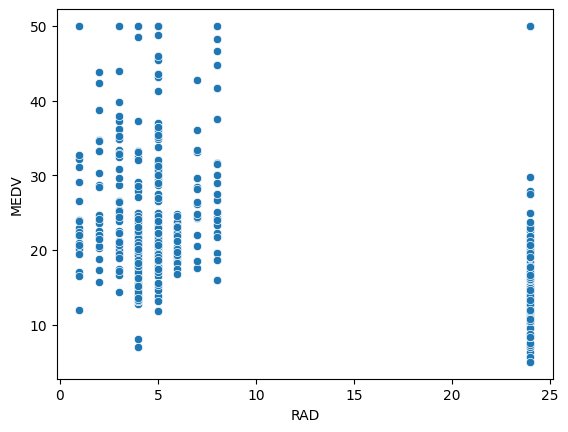

In [27]:
sns.scatterplot(data = boston, x = 'RAD', y= 'MEDV');

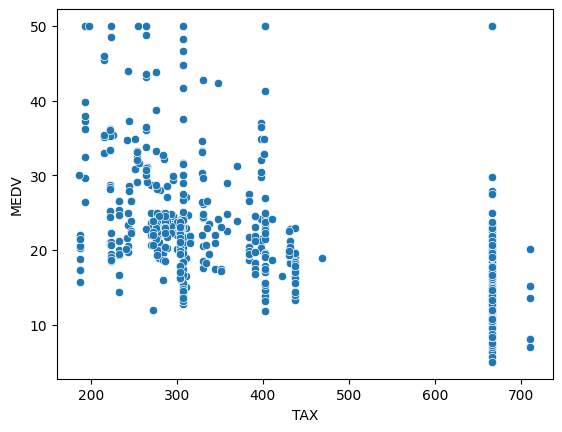

In [28]:
sns.scatterplot(data = boston, x = 'TAX', y= 'MEDV');

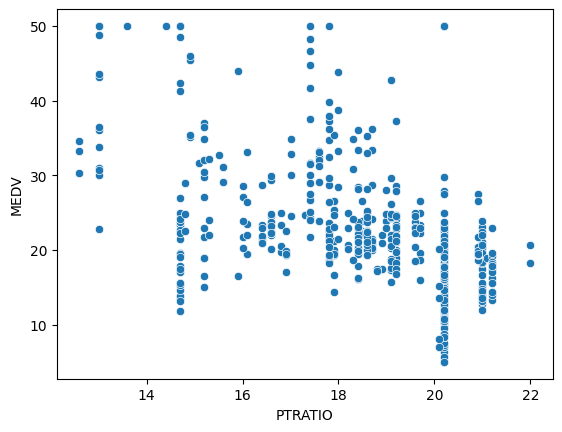

In [30]:
sns.scatterplot(data = boston, x = 'PTRATIO',y= 'MEDV');

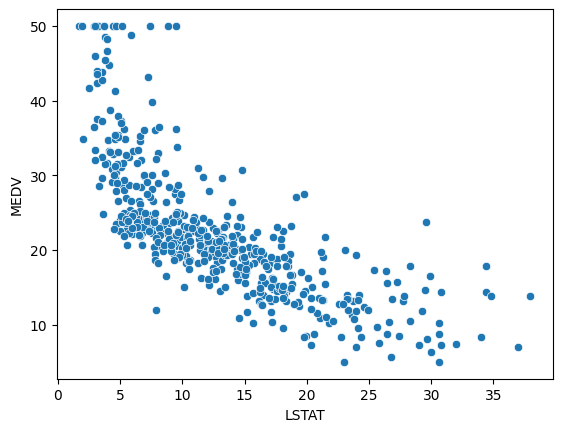

In [31]:
sns.scatterplot(data = boston, x ='LSTAT', y= 'MEDV');

**Plot the correlation heatmap and list your observations.**

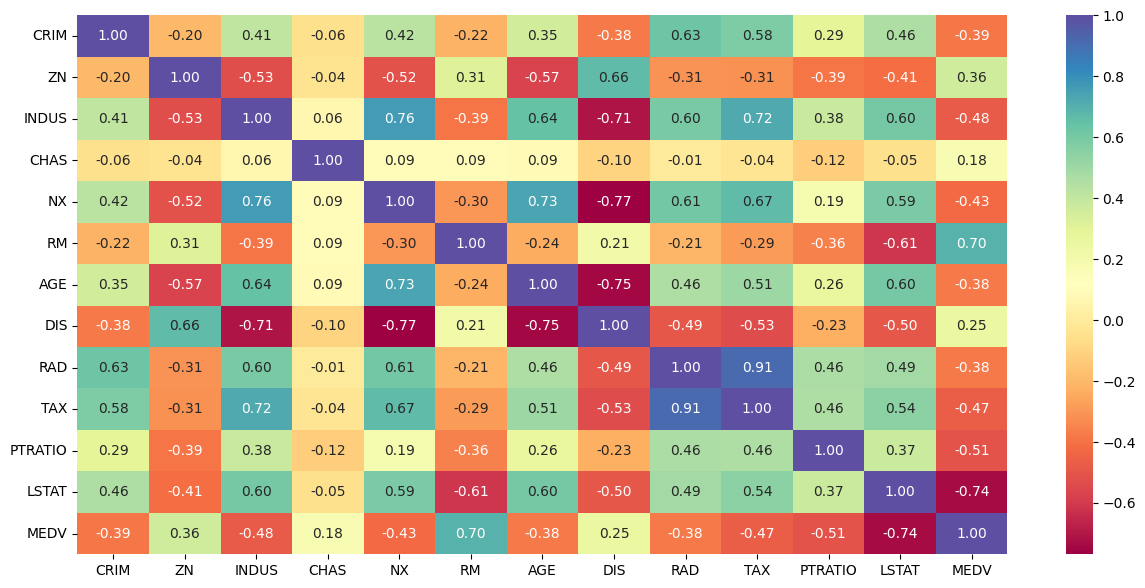

In [32]:
plt.figure(figsize = (15,7))
sns.heatmap(boston.corr(), annot= True, cmap = 'Spectral', fmt = '.2f');

### Split the dataset

Split the data into the dependent and independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [33]:
#drop the dependent variable from inputs
X = boston.drop(['MEDV'], axis = 1)

#make medv the dependent variable

y= boston[['MEDV']]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

### Model Building

**Fit the model to the training set**

In [35]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

**Get the score on training set**

In [36]:
#In sample
regression_model.score(X_train, y_train)

0.7073732058856179

**Write your own function for the R-squared score.**

In [40]:
def r_squared(model, X, y):
    y_mean = y.mean()
    SST = ((y - y_mean) ** 2).sum()
    SSE = ((y - model.predict(X)) ** 2).sum()
    r_square = 1 - SSE / SST
    return SSE, SST, r_square


SSE, SST, r_square = r_squared(regression_model, X_train, y_train)
print("SSE: ", SSE)
print("SST: ", SST)
print("R-squared: ", r_square)

SSE:  MEDV    8410.365735
dtype: float64
SST:  MEDV    28740.92839
dtype: float64
R-squared:  MEDV    0.707373
dtype: float64


**Get the score on test set**

In [37]:
#out of sample
regression_model.score(X_test, y_test)

0.7721684899134136

**Get the RMSE on test set**

In [41]:
# to check model performance
from sklearn.metrics import mean_squared_error
print(
    "The Root Mean Square Error (RMSE) of the model for the training set is ",
    np.sqrt(mean_squared_error(y_train, regression_model.predict(X_train))),
)

The Root Mean Square Error (RMSE) of the model for the training set is  4.874227661429436


**Get the model coefficients.**

In [38]:
#Display the coefficients of each variable
for idx, col_name in enumerate(X_train.columns):
  print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))

The coefficient for CRIM is -0.11384484836914008
The coefficient for ZN is 0.06117026804060645
The coefficient for INDUS is 0.05410346495874601
The coefficient for CHAS is 2.5175119591227144
The coefficient for NX is -22.248502345084372
The coefficient for RM is 2.6984128200099113
The coefficient for AGE is 0.004836047284751951
The coefficient for DIS is -1.5342953819992557
The coefficient for RAD is 0.29883325485901313
The coefficient for TAX is -0.011413580552025043
The coefficient for PTRATIO is -0.9889146257039406
The coefficient for LSTAT is -0.5861328508499133


In [42]:
# let's check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(regression_model.coef_, regression_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
CRIM,-0.113845
ZN,0.061170
INDUS,0.054103
CHAS,2.517512
NX,-22.248502
RM,2.698413
AGE,0.004836
DIS,-1.534295
RAD,0.298833
TAX,-0.011414


**Automate the equation of the fit**